In [1]:
import re
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def read_log(filestr):
    with open(filestr+'.log', 'r') as file:
        data = file.read()
    matches = re.findall(r'(.+-.+\S+)\s+\d+\s+(\d+.\d+e\S+)', data)
    return matches

In [3]:
cpu = read_log(f'./cpulog/16')
print(cpu)
cpu[0][1]

[('stencil-2d-5', '2.762800e-05'), ('stencil-2d-9', '4.331100e-05'), ('stencil-3d-7', '5.168390e-04'), ('stencil-3d-27', '2.394541e-03'), ('stencil-1d-3', '1.876000e-06'), ('stencil-1d-3-simd', '1.883000e-06'), ('head-2d serial', '8.348000e-06'), ('head-2d kernel', '1.170500e-05'), ('jacobi-2d serial', '5.801000e-06'), ('jacobi-2d kernel', '6.908000e-06'), ('fdtd-2d serial', '8.129600e-05'), ('fdtd-2d kernel', '1.488210e-04')]


'2.762800e-05'

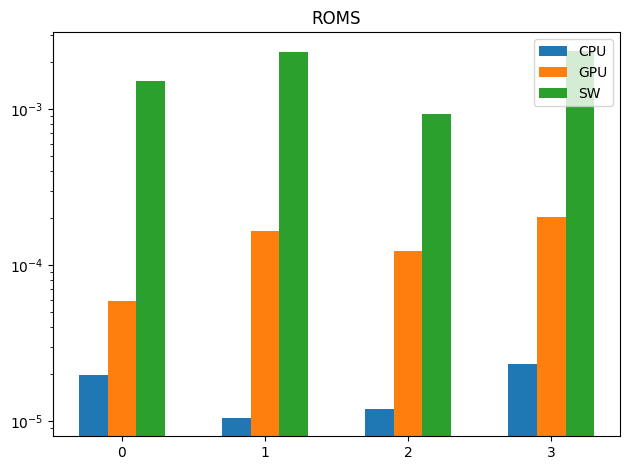

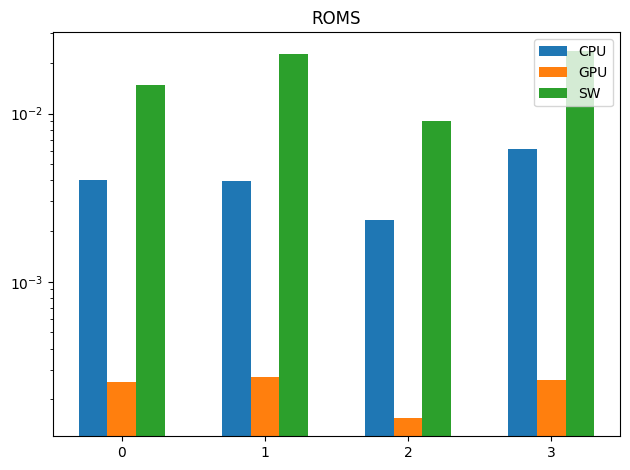

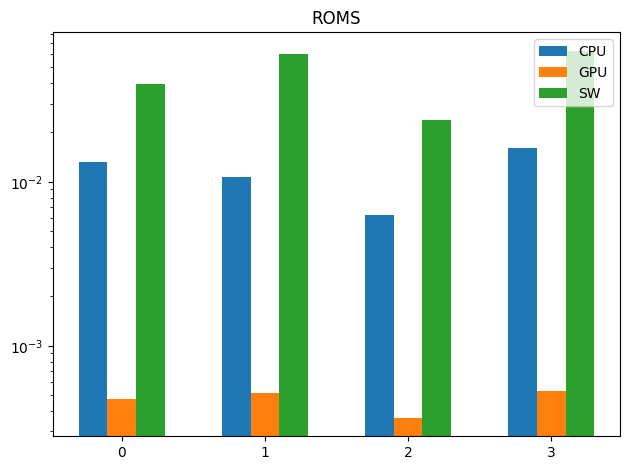

In [4]:
def read_roms_log(filestr):
    with open(filestr+'.log', 'r') as file:
        data = file.read()
    matches = re.findall(r'(\S+)\s+\d+\s+(\d+.\d+e\S+)', data)
    return matches

for i in ['ke','up','']:
    cpu = [float(x[1]) for x in read_roms_log(f'./roms/openmp'+i)]
    gpu = [float(x[1]) for x in read_roms_log(f'./roms/cuda'+i)]
    sw = [float(x[1]) for x in read_roms_log(f'./roms/sw'+i)]

    x = np.arange(len(cpu))
    width = 0.2 
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, cpu, width, label='CPU')
    rects2 = ax.bar(x, gpu, width, label='GPU')
    rects3 = ax.bar(x + width, sw, width, label='SW')
    ax.set_yscale('log')
    ax.set_xticks(x)

    ax.legend()
    ax.set_title('ROMS')
    fig.tight_layout()
    plt.savefig(f'./roms{i}.png')
    plt.show()


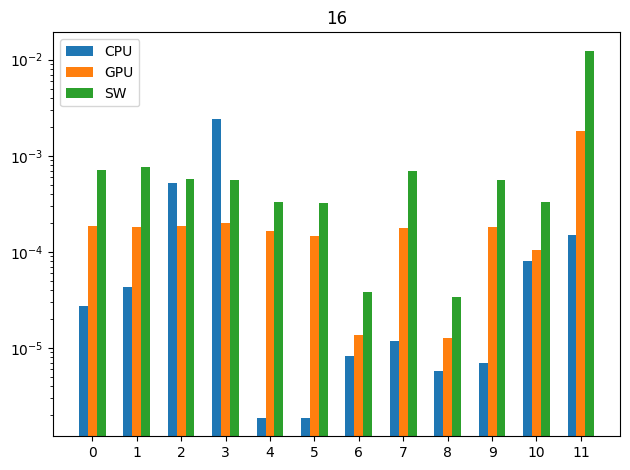

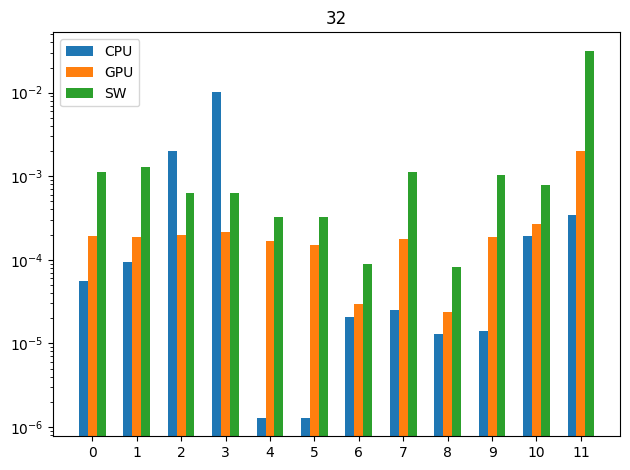

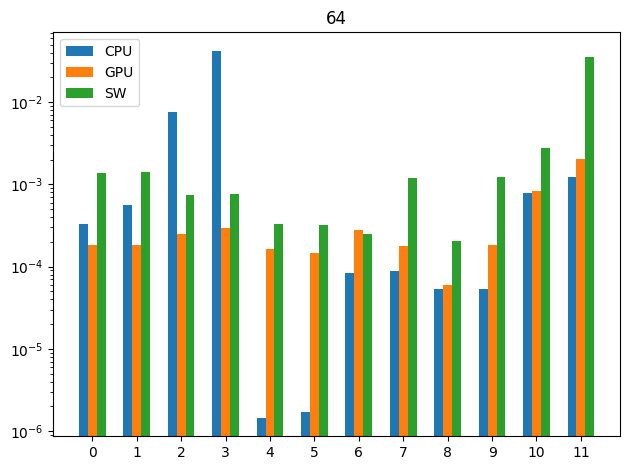

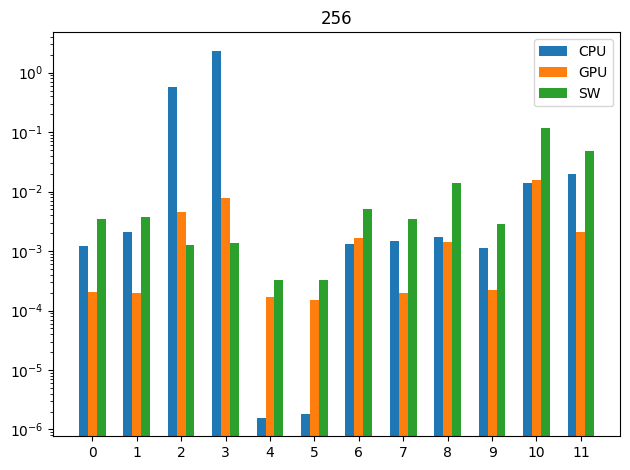

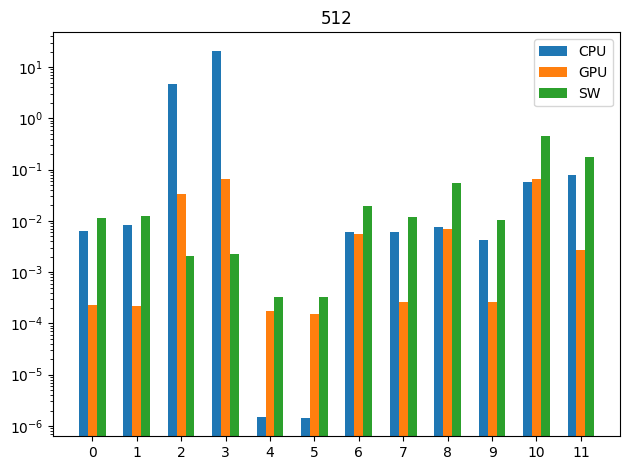

In [5]:
for lab in [16,32,64,256,512]:
    cpu = [float(i[1]) for i in read_log(f'./cpulog/{lab}')]
    gpu = [float(i[1]) for i in read_log(f'./gpulog/{lab}')]
    sw = [float(i[1]) for i in read_log(f'./swlog/out{lab}')]

    x = np.arange(len(cpu))
    width = 0.2 

    fig, ax = plt.subplots()

    rects1 = ax.bar(x - width, cpu, width, label='CPU')
    rects2 = ax.bar(x, gpu, width, label='GPU')
    rects3 = ax.bar(x + width, sw, width, label='SW')

    ax.set_yscale('log')

    ax.set_xticks(x)
    # ax.set_xticklabels(['stencil-2d-5', 'stencil-2d-9', 'stencil-3d-7', 'stencil-3d-27'])
    ax.legend()

    ax.set_title(f'{lab}')

    fig.tight_layout()
    plt.savefig(f'./{lab}.png')
    plt.show()
